# Kicad
https://news.ycombinator.com/item?id=35285769 Comparing Hobby PCB Vendors (lcamtuf.substack.com)
https://news.ycombinator.com/item?id=42590337 	Choosing an op-amp for your project (lcamtuf.substack.com)

jlcpcb

https://docs.kicad.org/



# Radio / Signal processing
https://rust.audio/

https://www.objc.io/issues/24-audio/audio-dog-house/ audio doghouse
https://www.dspguide.com/

https://www.analog.com/en/lp/001/beginners-guide-to-dsp.html
https://greenteapress.com/wp/think-dsp
t Oppenheim and Schafer, Discrete Time Signal Processing
https://ccrma.stanford.edu/%7Ejos/ 

Faust language?  https://github.com/grame-cncm/faust https://faustplayground.grame.fr/ https://faust.grame.fr/ https://ccrma.stanford.edu/~jos/aspf/Primer_FAUST_Language.html

Phase locked loops  https://en.wikipedia.org/wiki/Phase-locked_loop
freuency doubling - put voltage controlled oscillator in feedback loop with frequency divider

https://en.wikipedia.org/wiki/Phase_detector pahse detector

4 point measurement


frequency mixing https://en.wikipedia.org/wiki/Frequency_mixer

Lock in amplifier. phase sensitive detection

Johnson noise
shot noise
pink noise 1/f noise


https://en.wikipedia.org/wiki/Ring_modulation
https://en.wikipedia.org/wiki/Gilbert_cell 

https://en.wikipedia.org/wiki/Gyrator


 https://news.ycombinator.com/item?id=43073808  https://hforsten.com/homemade-polarimetric-synthetic-aperture-radar-drone.html Homemade polarimetric synthetic aperture radar drone 

https://github.com/sdrangan/sdrlab

https://www.rtl-sdr.com/university-course-on-digital-signal-processing-with-the-rtl-sdr/ Yea, this is the lab I remember. Sending images through baofeng to rtlsdr https://sites.google.com/berkeley.edu/ee123-sp19/labs

 SWR  https://en.wikipedia.org/wiki/Standing_wave_ratio standing wave ration
https://en.wikipedia.org/wiki/Slotted_line
https://en.wikipedia.org/wiki/Power_dividers_and_directional_couplers

https://www.youtube.com/watch?v=BijMGKbT0Wk&ab_channel=Rohde%26Schwarz  Understanding VSWR and Return Loss
https://www.youtube.com/watch?v=_pJ8kh0i2u4&ab_channel=MicrowaveLabcast  Lecture07: Impedance Matching with the Smith Chart

smith chart

balun- balunced to unbalanced https://en.wikipedia.org/wiki/Balun


https://en.wikipedia.org/wiki/Quarter-wave_impedance_transformer
https://en.wikipedia.org/wiki/Dual_impedance 1/Z

nanoVNA https://nanovna.com/
https://www.youtube.com/watch?v=tLMAStiaAxU&ab_channel=HamRadioCrashCourse

transmission lines equations
Z is boundary conditions
reflection coefficients $\Gamma$

Vmax = |Vf| + |Vr|
Vmin = |Vf| - |Vr|



tinysa https://tinysa.org/



# Audio
Band pass
hw:0,2

We could see doppler which is pretty cool
alsa vs 


https://github.com/supriya-project/supriya/ supercollider via python




# Radar
Lincoln Lab course

Pluto sdr course

passive radar
kraken vs pluto





Sonar
https://python-sounddevice.readthedocs.io/en/0.5.1/examples.html#input-to-output-pass-through


https://luaradio.io/

Baby steps:

1. make a noise
2. fft of input

Measure delay in sound out to sound in. Autocorrelation


In [ ]:
import sounddevice as sd
import numpy as np

def passthrough(indata, outdata, frames, time, status):
    if status:
        print(status)
    outdata[:] = indata  # direct passthrough

# stereo, 44100 Hz
with sd.Stream(channels=1, callback=passthrough, samplerate=44100):
    print("Looping... Ctrl+C to stop.")
    sd.sleep(10000)

Task 1. attach gnuradio audio in sink to auido out sink
GQ waterfall


In [3]:
! python3 -m pip install gnuradio-core

ERROR: Could not find a version that satisfies the requirement gnuradio-core (from versions: none)
ERROR: No matching distribution found for gnuradio-core


In [1]:
from gnuradio import gr, analog, audio

In [2]:
from gnuradio import gr, analog, audio
import time
class SineToAudio(gr.top_block):
    def __init__(self):
        super().__init__()

        samp_rate = 44100
        freq = 440

        self.src = analog.sig_source_f(samp_rate, analog.GR_SIN_WAVE, freq, 0.3)
        self.sink = audio.sink(samp_rate, '', True)

        self.connect(self.src, self.sink)

tb = SineToAudio()
tb.start()
time.sleep(2)
tb.stop()
tb.wait()

## gnuradio
URH https://github.com/jopohl/urh
gnuradio
luaradio

https://wiki.gnuradio.org/index.php/Tutorials

sudo apt-get install gnuradio

`gnuradio-companion`

https://pysdr.org/content/rtlsdr.html https://news.ycombinator.com/item?id=24750588

https://github.com/jtarrio/radioreceiver web based radio receiver. webusb

https://greenteapress.com/wp/think-dsp/

https://github.com/F5OEO/rpitx
https://osmocom.org/projects/osmo-fl2k/wiki

https://www.rtl-sdr.com/hackaday-supercon-2024-microcontrollers-are-just-radios-in-disguise/
https://www.rtl-sdr.com/paper-on-building-a-low-cost-rtl-sdr-based-hydrogen-line-radio-telescope/

https://www.krakenrf.com/

https://github.com/gqrx-sdr/gqrx
https://github.com/miek/inspectrum

Audio from computer
Multi microphone
Synced?

FPGA.


retrodirective radio
PLL
swap - size weight and power

heterodyning
LNA
mixer
filter
amplifier
antenna


# Open Circuits
Linear relation algebra. Modules for s/omega space
That open systems paper thing.


Could do left right top down composition to get a layout at the same time.



In [ ]:
import sympy as sp
counter = 0
Circuit = namedtuple("circuit", ["constraints", "variables"])

def R(r):
    """ Resistor """
    i,v0,v1 = sp.symbols(f"i{counter} v0_{counter} v1_{counter}")
    counter += 1
    Circuit(Eq(v0 - v1, i*r), [i, v0, v1])
def C(c):
    """ Capacitor """
    i,v0,v1 = sp.symbols(f"i{counter} v0_{counter} v1_{counter}")
    counter += 1
    Circuit(Eq(i, c*sp.diff(v0-v1)), [i, v0, v1])
def L(l):
    """ Inductor """
    i,v0,v1 = sp.symbols(f"i{counter} v0_{counter} v1_{counter}")
    counter += 1
    Circuit(Eq(v0 - v1, l*sp.diff(i)), [i, v0, v1])
def V(v):
    """ Voltage source"""
    i,v0,v1 = sp.symbols(f"i{counter} v0_{counter} v1_{counter}")
    counter += 1
    Circuit(Eq(v0 - v1, v), [i, v0, v1])


def freshen(c):
    # rename all interior variables
    pass
def transfer(ins, outs, c):
    pass
def input_impedance(c):
    pass





# VLSI / ASIC

https://github.com/IHP-GmbH/IHP-AnalogAcademy

https://designers-guide.org/analysis/dg-spice/index.html  The Designer's Guide to SPICE and Spectre 
https://designers-guide.org/index.html

https://en.wikipedia.org/wiki/Spectre_Circuit_Simulator cadence spice simulator
https://en.wikipedia.org/wiki/Ken_Kundert

verilog A

sdc synopsys design constraint
https://www.vlsi-expert.com/2011/02/synopsys-design-constraints-sdc-basics.html
design rules
timing

https://enicslabs.com/academic-courses/dvd-english/ digital vlsi design -  adam teman
https://teamvlsi.com/

https://en.wikipedia.org/wiki/Design_for_testing dft 
https://parts.jpl.nasa.gov/asic/Sect.3.3.html 
https://parts.jpl.nasa.gov/asic/Sect.3.4.html#A0  Chapter Four: Design for Radiation Tolerance



https://www.reddit.com/r/chipdesign/ I feel like htse people live in a different universe.
Cadence and Synposys
Analog vlsi design?

VLSI algorithms
Weste and Harris CMOS VLSI Design https://pages.hmc.edu/harris/cmosvlsi/4e/index.html


Rabaey Digital Integrated Circuits
Baker CMOS Circuit Design, Layout, and Simulation
Razavi Design of Analog CMOS Integrated Circuits
Allen and Holberg CMOS Analog Circuit Design
Gray, Hurst, Lewis, and Meyer Analysis and Design of Analog Integrated Circuits
Bake CMOS mixed signal circuit design
Razavi RF Microelectronics




Jim Williams
Bob Pease
Paul Brokaw
Walt Jung
Doug Self
Randy Slone
Horowitz and Hill
Sedra and Smith
Art of Electronics
Designing Analog Chips
Designing Audio Power Amplifiers
Designing Tube Preamps for Guitar and Bass

SAR ADC
https://github.com/wulffern/sun_sar9b_sky130nm?tab=readme-ov-file
https://github.com/wulffern/cicpy
https://github.com/wulffern/ciccreator
https://analogicus.com/aic2024/

https://ciccreator.readthedocs.io/en/latest/basics/technology.html
"ome common layers are OD, PO, M1, M2, etc. "

gdsii https://www.zerotoasiccourse.com/terminology/gds2/

https://www.zerotoasiccourse.com/terminology/magic/ vlsi layout tool magic
https://www.zerotoasiccourse.com/terminology/openlane/ 

gamma : 500. 

graph partitioning

"rules"
DRC
ERC

PDK
https://skywater-pdk.readthedocs.io/en/main/ sky130nm
https://foss-eda-tools.googlesource.com/?format=HTML
https://tinytapeout.com/

https://woset-workshop.github.io/WOSET2020.html
https://woset-workshop.github.io/ open sourceda tech

# Spice
maybe raw spaice is the way to go
ngspice https://ngspice.sourceforge.io/


ltspice
pspice
hspice
xyce https://xyce.sandia.gov/ parallel

https://qucs.sourceforge.net/ gui 


https://ngspice.sourceforge.io/ngspice-tutorial.html
https://ngspice.sourceforge.io/docs/ngspice-manual.pdf

dc ac transient pole-zero small signal noise sensitity

xspice - mixed circuit analysis
verilog-a
https://yosyshq.readthedocs.io/projects/yosys/en/latest/cmd/write_spice.html yosys write spice


tclspice
stastistical circuit analysis

https://en.wikipedia.org/wiki/Netlist


In [12]:
%%file /tmp/volt_div.cir

* comment


.title This is my Voltage divider!!!!
voltage divider netlist
V1 in 0 1
R1 in out 1k
R2 out 0 2k
.end

* Analysis
.tran 1ms 10ms


.print tran v(1) v(2) v(2)/v(1)
.end

Overwriting /tmp/volt_div.cir


In [13]:
! ngspice -b /tmp/volt_div.cir


No compatibility mode selected!


Circuit: This is my Voltage divider!!!!

Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

Error: no data saved for Transient analysis; analysis not run
doAnalyses: not found

run simulation(s) aborted
Error: .print: no tran analysis found.

Total analysis time (seconds) = 0

Total elapsed time (seconds) = 0.002 

Total DRAM available = 62983.066 MB.
DRAM currently available = 24869.062 MB.
Maximum ngspice program size =   19.910 MB.
Current ngspice program size =   12.000 MB.

Shared ngspice pages =   10.250 MB.
Text (code) pages =    5.316 MB.
Stack = 0 bytes.
Library pages =    1.965 MB.



pyspice
sudo apt install libngspice0-dev
https://pyspice.fabrice-salvaire.fr/releases/v1.5/example-introduction.html

`circuit.raw_spice +=`

Interesting. I think this is a really thin spice generator?

In [1]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
circuit = Circuit('Voltage Divider')

circuit.V('input', 'in', circuit.gnd, 10@u_V)
circuit.R(1, 'in', 'out', 9@u_kΩ)
circuit.R(2, 'out', circuit.gnd, 1@u_kΩ)


simulator = circuit.simulator(temperature=25, nominal_temperature=25)

analysis = simulator.operating_point()
for node in (analysis['in'], analysis.out): # .in is invalid !
    print('Node {}: {} V'.format(str(node), float(node)))

2024-09-25 11:49:57,519 - PySpice.Spice.Netlist.Node.__init__ - WARNING - Node name 'in' is a Python keyword
2024-09-25 11:49:57,608 - PySpice.Spice.NgSpice.Shared.NgSpiceShared._init_ngspice - WARNING - Unsupported Ngspice version 36
Node in: 10.0 V
Node out: 1.0 V


/tmp/ipykernel_290852/1402177749.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Node {}: {} V'.format(str(node), float(node)))


In [4]:
print(circuit)
print(simulator)

.title Voltage Divider
Vinput in 0 10V
R1 in out 9kOhm
R2 out 0 1kOhm

.title Voltage Divider
Vinput in 0 10V
R1 in out 9kOhm
R2 out 0 1kOhm
.options TEMP = 25C
.options TNOM = 25C
.end



https://chatgpt.com/c/66edd530-4b40-8008-a334-f3952eb47df3

https://schemdraw.readthedocs.io/en/stable/

https://github.com/nturley/netlistsvg more for verilog?

skidl

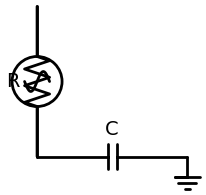

In [5]:
import matplotlib.pyplot as plt
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d.add(elm.SourceSin())  # AC source
    #d.add(elm.Resistor().down().label('R'))  # Resistor
    #d.add(elm.Capacitor().right().label('C'))  # Capacitor
    d.add(elm.Ground())  # Ground

d.draw()
plt.show()


skidl 

# Lcapy
https://lcapy.readthedocs.io/en/latest/#
https://lcapy.readthedocs.io/en/latest/tutorials.html
https://github.com/mph-/lcapy

https://github.com/mph-/zfitpy fit model to measured impedance

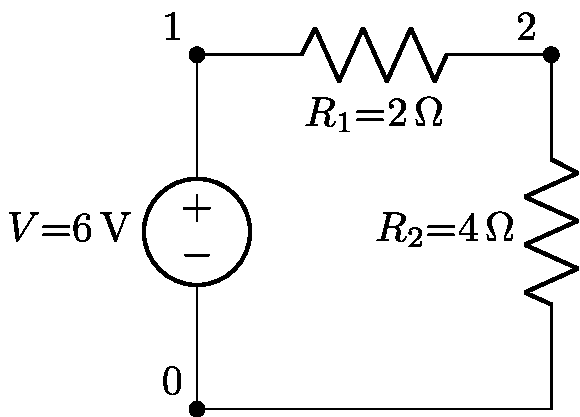

In [29]:

from lcapy import Circuit
import PIL.Image
a = Circuit("""
V 1 0 6; down=1.5
R1 1 2 2; right=1.5
R2 2 0_2 4; down
W 0 0_2; right""")
def draw(a):
    a.draw(filename="/tmp/circuit.png")# something is there but dark mode? Dark mode means I can't just use this. Light mode is too awful.
    return PIL.Image.open("/tmp/circuit.png").convert("RGB")
# show /tmp/circuit.png
#from IPython.display import Image
draw(a)

/home/philip/.local/lib/python3.10/site-packages/lcapy/schematic.py:622: UserWarning: No schematic drawing hints provided!
  warn('No schematic drawing hints provided!')


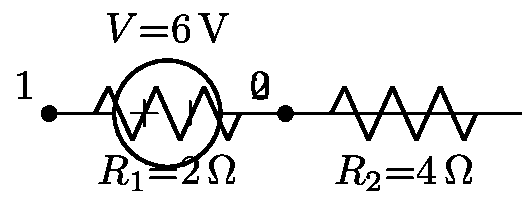

In [ ]:
a = Circuit("""
V 1 0 6;
R1 1 2 2; 
R2 2 0_2 4;
W 0 0_2; """)
draw(a)
# ok. hints necessary. Hmm.

Graph layout problem



In [32]:
dir(a)

['Aparams',
 'Bparams',
 'Gparams',
 'Hparams',
 'Idict',
 'Iname',
 'Isc',
 'Sparams',
 'Tparams',
 'Vdict',
 'Vname',
 'Voc',
 'Yparams',
 'Yparams3',
 'Yparamsn',
 'Zparams',
 'Zparams3',
 'Zparamsn',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add',
 '_add_ground',
 '_add_test_current_source',
 '_add_test_voltage_source',
 '_check_ic',
 '_check_nodes',
 '_cpt_add',
 '_do_simplify_combine',
 '_dummy_node_name',
 '_elements',
 '_find_combine_subsets',
 '_get_Vd',
 '_groups',
 '_in_parallel_all',
 '_in_parallel_names',
 '_in_series_all',
 '_in_series_names',
 '_include',
 '_init_parser',
 '_initialize_from_circuit',
 '_initialize_